# 날짜 데이터

In [52]:
import pandas as pd
import numpy as np

In [212]:
product = {'Name': ['Gildong', 'Sarang', 'Jiemae', 'Yeoin', 'James', 'Sen'],
        'Product_N': [1, 3, 4, 2, 3, 4],
        'Price': [56000, 23000, 44000, 52000, 52000, 60000]}
Product = pd.DataFrame(product)

Sales = {'Name': ['Gildong', 'Sarang', 'Jiemae', 'Yeoin', 'James', 'Sen'],
        'Date': ['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06'],
        'qct': [1,4,7,9,4,3]}
Sales = pd.DataFrame(Sales)

**복습**

In [213]:
sales0 = pd.merge(Product, Sales, how = 'inner', on = 'Name')

In [214]:
sales0['Date'] = pd.to_datetime(sales0['Date'])
sales0['weekday'] = sales0['Date'].dt.weekday

In [215]:
sales0.head()

,Name,Product_N,Price,Date,qct,weekday
0,Gildong,1,56000,2023-02-01,1,2
1,Sarang,3,23000,2023-02-02,4,3
2,Jiemae,4,44000,2023-02-03,7,4
3,Yeoin,2,52000,2023-02-04,9,5
4,James,3,52000,2023-02-05,4,6


In [216]:
sales0['Amt'] = sales0['qct'] * sales0['Price']

In [217]:
sales0.groupby(['Product_N','Date'],as_index = False)['Amt'].sum()

,Product_N,Date,Amt
0,1,2023-02-01,56000
1,2,2023-02-04,468000
2,3,2023-02-02,92000
3,3,2023-02-05,208000
4,4,2023-02-03,308000
5,4,2023-02-06,180000


-----------------------------------

In [54]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Date    6 non-null      object
 2   qct     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [55]:
# Sales['Date'] = pd.to_datetime(Sales['Date'])
Sales['Date'] = pd.to_datetime(Sales['Date'], format = '%Y-%d-%m')

In [56]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    6 non-null      object        
 1   Date    6 non-null      datetime64[ns]
 2   qct     6 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 272.0+ bytes


In [57]:
Sales1 = Sales.copy()

In [58]:
Sales1['Week'] = Sales1['Date'].dt.isocalendar().week
Sales1.head()

,Name,Date,qct,Week
0,Gildong,2023-01-02,1,1
1,Sarang,2023-02-02,5,5
2,Jiemae,2023-03-02,7,9
3,Yeoin,2023-04-02,9,13
4,James,2023-05-02,4,18


In [59]:
Sales1['Year'] = Sales1['Date'].dt.year

In [60]:
Sales1['Month'] = Sales1['Date'].dt.month

In [61]:
# 일
Sales1['Day'] = Sales1['Date'].dt.day

In [62]:
# 요일
Sales1['Weekday'] = Sales1['Date'].dt.weekday

In [63]:
# 요일 이름
Sales1['Day_name'] = Sales1['Date'].dt.day_name()

In [64]:
Sales1.head()

,Name,Date,qct,Week,Year,Month,Day,Weekday,Day_name
0,Gildong,2023-01-02,1,1,2023,1,2,0,Monday
1,Sarang,2023-02-02,5,5,2023,2,2,3,Thursday
2,Jiemae,2023-03-02,7,9,2023,3,2,3,Thursday
3,Yeoin,2023-04-02,9,13,2023,4,2,6,Sunday
4,James,2023-05-02,4,18,2023,5,2,1,Tuesday


- shift
    * 시계열 데이터에서 시간의 흐름 전후로 정보를 이동시킬 때 사용

In [82]:
Sales1 = Sales.copy()

In [83]:
Sales1['qct_lag'] = Sales1['qct'].shift() #default 값은 1

- rolling + 집계함수
    * 시간의 흐름에 따라 일정 기간 동안 평균을 이동하면서 구하기
    * n은 기본 값
    * min_periods: 최소 데이터 수

In [84]:
Sales1['qct_MA2_1'] = Sales1['qct'].rolling(2, min_periods = 1).mean()

In [85]:
Sales1['qct_MA2_2'] = Sales1['qct'].rolling(2, min_periods = 1).mean()

In [86]:
Sales1['qct_D'] = Sales1['qct'].diff()

In [87]:
Sales1

,Name,Date,qct,qct_lag,qct_MA2_1,qct_MA2_2,qct_D
0,Gildong,2023-01-02,1,NaN,1.0,1.0,NaN
1,Sarang,2023-02-02,5,1.0,3.0,3.0,4.0
2,Jiemae,2023-03-02,7,5.0,6.0,6.0,2.0
3,Yeoin,2023-04-02,9,7.0,8.0,8.0,2.0
4,James,2023-05-02,4,9.0,6.5,6.5,-5.0
5,Sen,2023-06-02,3,4.0,3.5,3.5,-1.0


# 시각화 라이브러리

- matplotlib

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
product = {'Name': ['Gildong', 'Sarang', 'Jiemae', 'Yeoin', 'James', 'Sen'],
        'Product_N': [1, 3, 4, 2, 3, 4],
        'Price': [56000, 23000, 44000, 52000, 52000, 60000]}
Product = pd.DataFrame(product)

Sales = {'Name': ['Gildong', 'Sarang', 'Jiemae', 'Yeoin', 'James', 'Sen'],
        'Date': ['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06'],
        'qct': [1,5,7,9,4,3]}
Sales = pd.DataFrame(Sales)

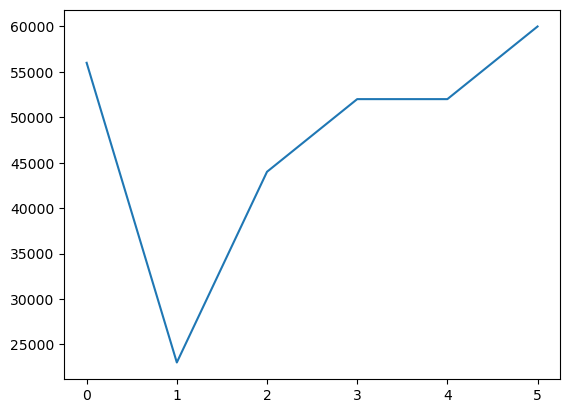

In [95]:
plt.plot(Product['Price'])

plt.show()

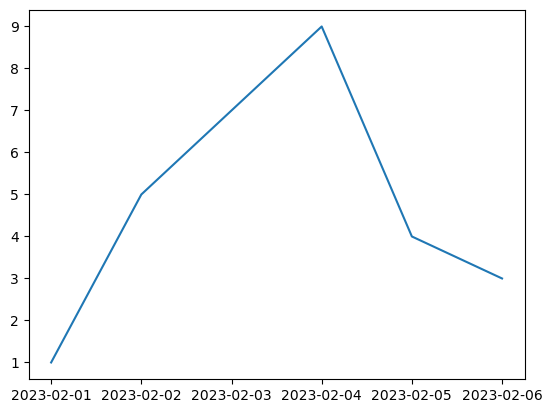

In [98]:
plt.plot('Date','qct', data=Sales)

- 그래프 꾸미기

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


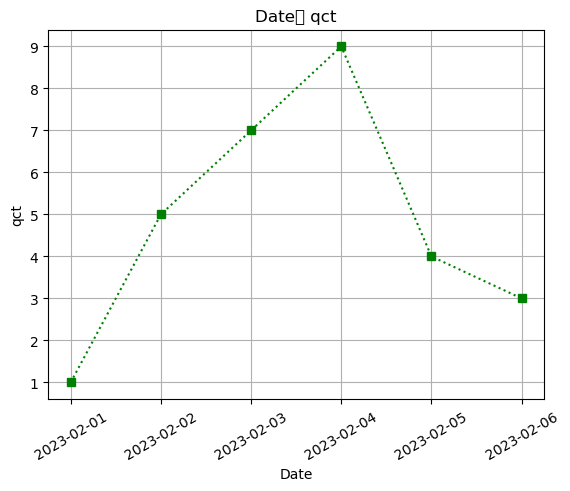

In [104]:
plt.plot('Date','qct', data=Sales,
        color = 'green',
        linestyle = 'dotted',
        marker = 's')


plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('qct')
plt.title('Date별 qct')
plt.grid()

- 여러 그래프 그리기

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


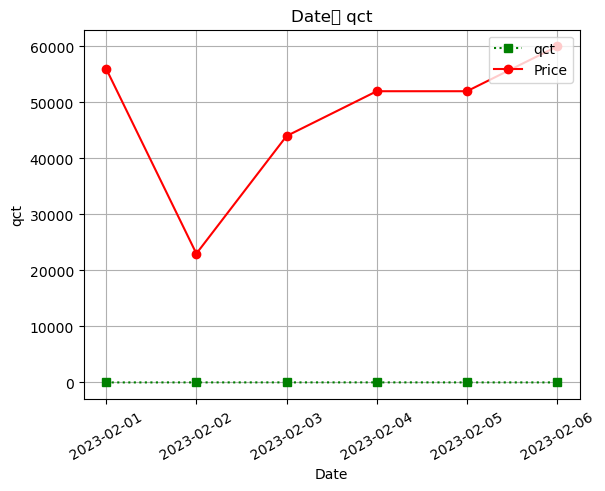

In [111]:
plt.plot('Date','qct', data=Sales,
        color = 'green',
        linestyle = 'dotted',
        marker = 's',
        label = 'qct')
plt.plot('Price', data=Product,
        color = 'red',
        linestyle = 'solid',
        marker = 'o',
        label = 'Price' )


plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('qct')
plt.legend(loc = 'upper right') # loc는 위치, 레이블 위치
plt.title('Date별 qct')
plt.grid()

- 축 범위 조정 & 그래프 크기 조정

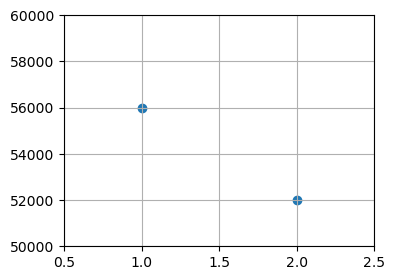

In [128]:
plt.figure(figsize = (4,3))
plt.scatter('Product_N', 'Price', data= Product, label = 'Price')

plt.xlim(0.5, 2.5)
plt.ylim(50000, 60000)
plt.grid()
plt.show()

- 수직 선 수평 선 추가

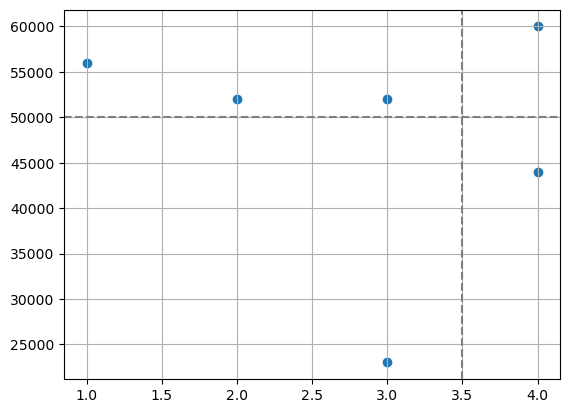

In [135]:
plt.scatter('Product_N', 'Price', data= Product, label = 'Price')

plt.axhline(50000, color = 'gray', linestyle = '--')
plt.axvline(3.5, color = 'gray', linestyle = '--')
plt.grid()
plt.show()

- 그래프에 텍스트 추가

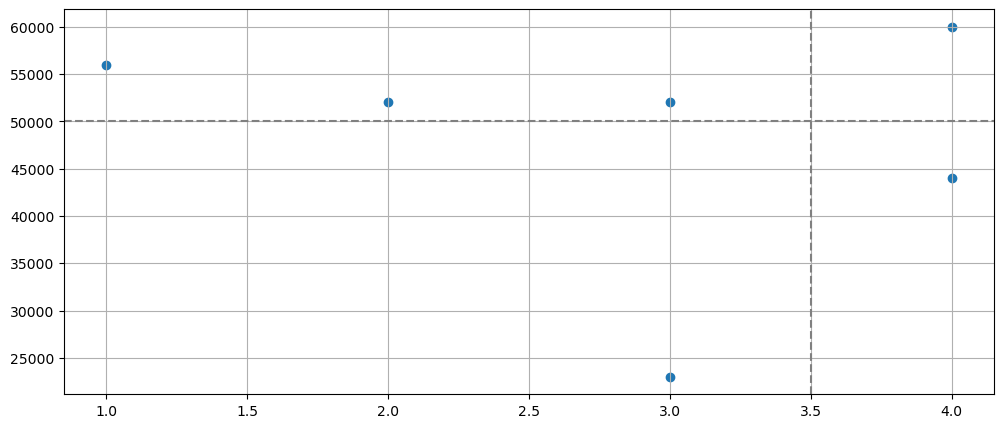

In [143]:
plt.figure(figsize = (12, 5))
plt.scatter('Product_N', 'Price', data = Product)
plt.axhline(50000, color = 'gray', linestyle = '--')
plt.axvline(3.5, color = 'gray', linestyle = '--')

# plt.text(45000, 1.4, '50000')
# plt.text(35000, 3.0, '3.5')

plt.grid()
plt.show()

- 추가 기능: 여러 그래프 나눠서 그리기

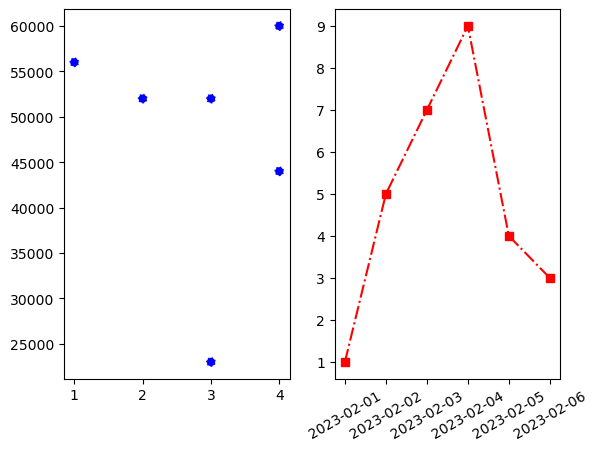

In [157]:
plt.subplot(1,2,1)
plt.scatter('Product_N', 'Price', data = Product,
         color = 'Blue',
         linestyle = 'dotted',
         marker = 'o')

plt.subplot(1,2,2)
plt.plot('Date', 'qct', data = Sales,
         color = 'Red',
         linestyle = '-.',
         marker = 's')
plt.xticks(rotation = 30)
plt.show()

몇가지 차트들

- 히스토그램
    * bins를 조절하여 그래프를 살펴본다

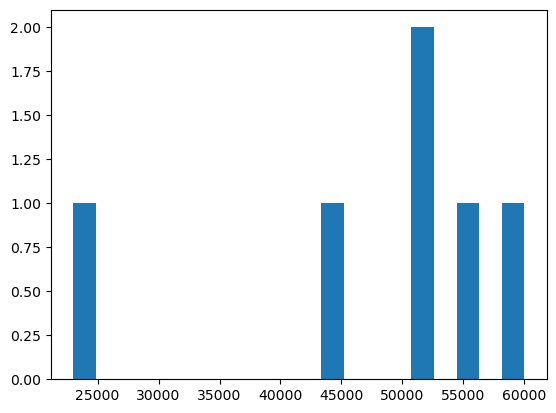

In [185]:
plt.hist('Price', bins = 20, data = sales0)
plt.show()

- density plot(확률 밀도 함수)

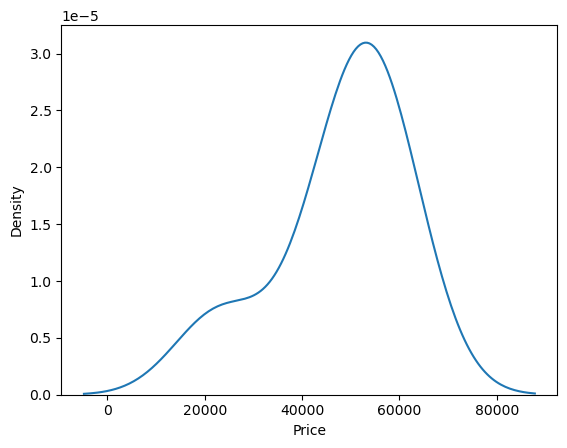

In [184]:
sns.kdeplot('Price', data = sales0)
plt.show()

- 박스플롯

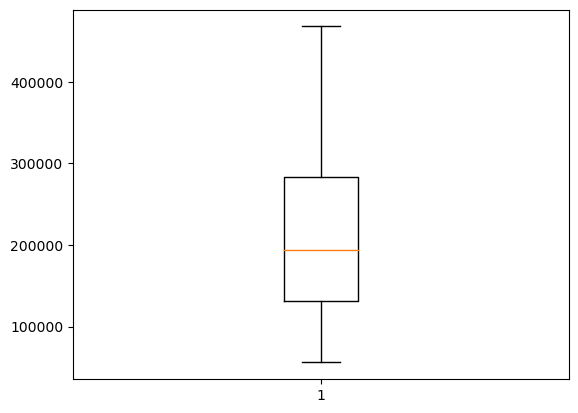

In [181]:
plt.boxplot('Amt', data = sales0)
plt.show()

- 산점도

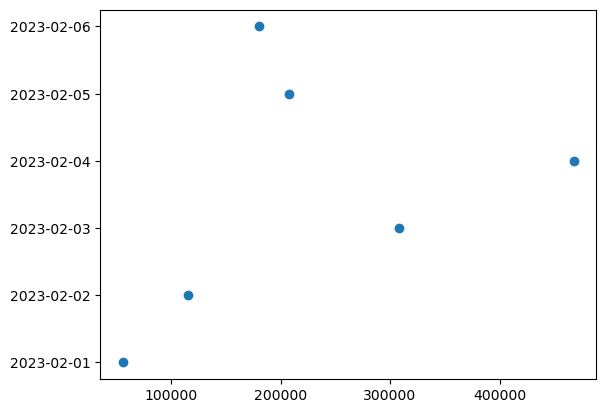

In [188]:
plt.scatter('Amt','Date', data= sales0)
plt.show()

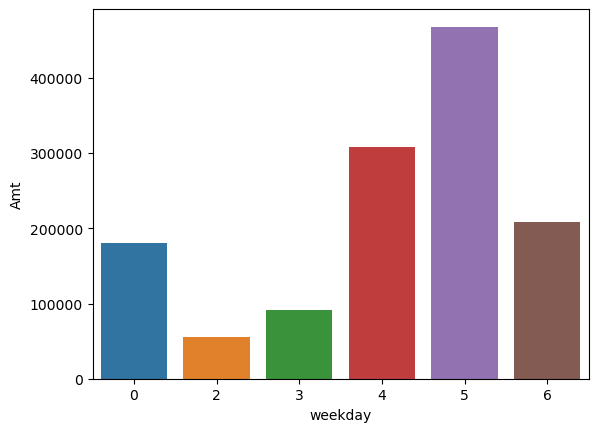

In [224]:
sns.barplot(x = 'weekday', y = 'Amt', data= sales0)
plt.show()

# 단변량 분석

**수치형**

1) 기초통계량

- 평균

In [218]:
np.mean(sales0['Amt'])

218666.66666666666

In [219]:
sales0['Amt'].mean()

218666.66666666666

- 중앙값

In [220]:
np.median(sales0['Amt'])

194000.0

In [221]:
sales0['Amt'].median()

194000.0

- 최빈값

In [222]:
sales0['qct'].mode()

0    4
Name: qct, dtype: int64

- 4분위수

In [225]:
sales0.describe()

,Product_N,Price,qct,weekday,Amt
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.833333,47833.333333,4.666667,3.333333,218666.666667
std,1.169045,13272.779161,2.875181,2.160247,151169.661859
min,1.000000,23000.000000,1.000000,0.000000,56000.000000
25%,2.250000,46000.000000,3.250000,2.250000,114000.000000
50%,3.000000,52000.000000,4.000000,3.500000,194000.000000
75%,3.750000,55000.000000,6.250000,4.750000,283000.000000
max,4.000000,60000.000000,9.000000,6.000000,468000.000000


2) 시각화

- hist(히스토그램)

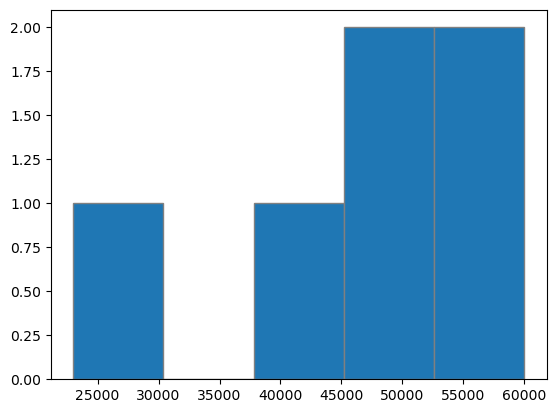

In [239]:
plt.hist('Price', bins = 5, data=sales0, edgecolor = 'gray')
plt.show()

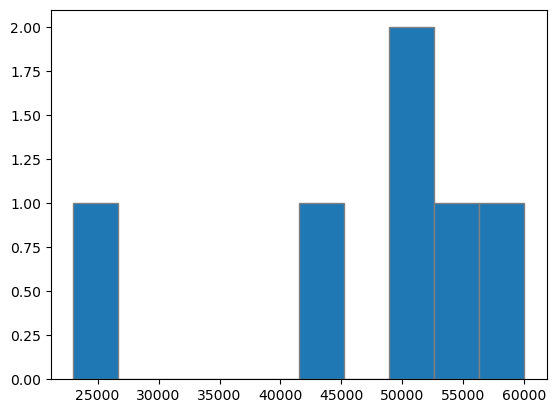

In [238]:
plt.hist('Price', bins = 10, data=sales0, edgecolor = 'gray')
plt.show()

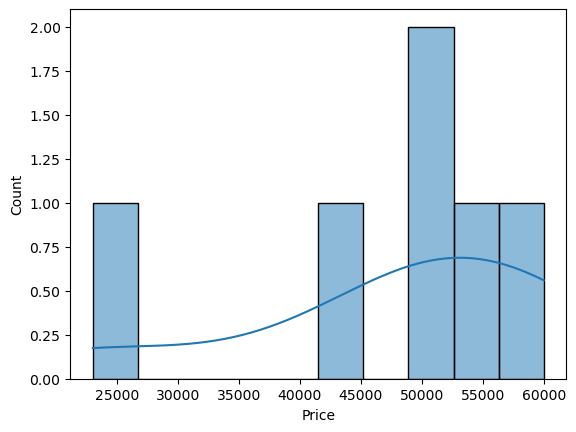

In [263]:
sns.histplot(x = 'Price', data = sales0, bins = 10, kde = True)
plt.show()

- kdeplot
    * kde = True : 히스토그램과 밀도함수 같이 표시

<AxesSubplot:xlabel='Price', ylabel='Density'>

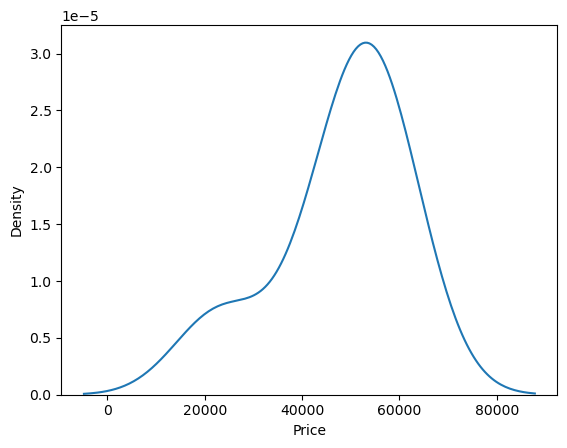

In [242]:
sns.kdeplot(x='Price',data=sales0)

- boxplot
    * vert = False : 옆으로 그리기

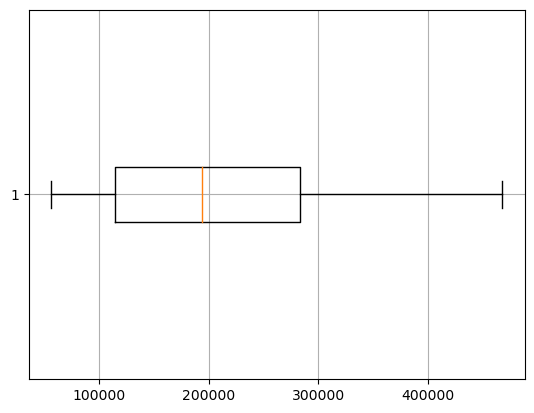

In [246]:
plt.boxplot('Amt', data = sales0, vert = False)
plt.grid()
plt.show()

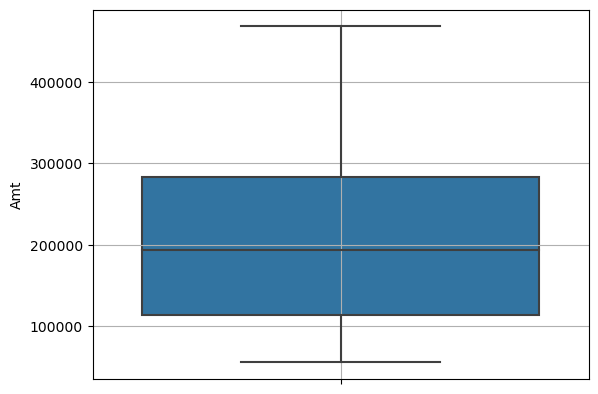

In [248]:
sns.boxplot(y = "Amt" , data = sales0)
plt.grid()
plt.show()

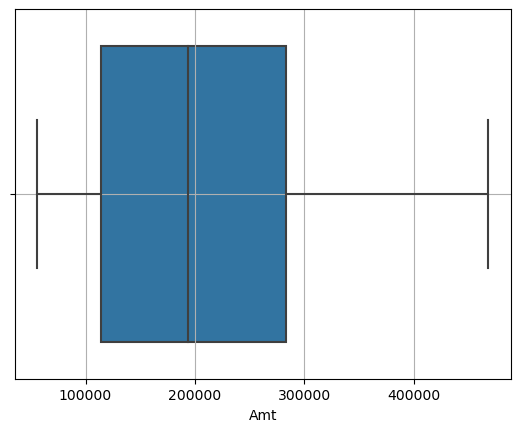

In [249]:
sns.boxplot(x = "Amt" , data = sales0)
plt.grid()
plt.show()

**범주형**

1. 기초통계량

- 범주별 빈도수

In [251]:
sales0['Name'].value_counts()

Gildong    1
Sarang     1
Jiemae     1
Yeoin      1
James      1
Sen        1
Name: Name, dtype: int64

- 범주별 비율

In [253]:
sales0['Name'].value_counts()/sales0.shape[0]

Gildong    0.166667
Sarang     0.166667
Jiemae     0.166667
Yeoin      0.166667
James      0.166667
Sen        0.166667
Name: Name, dtype: float64

2. 시각화

- bar chart

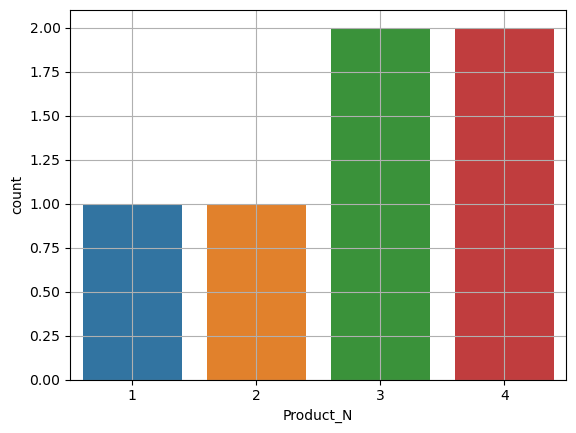

In [257]:
sns.countplot(x = 'Product_N', data=sales0)
plt.grid()
plt.show()

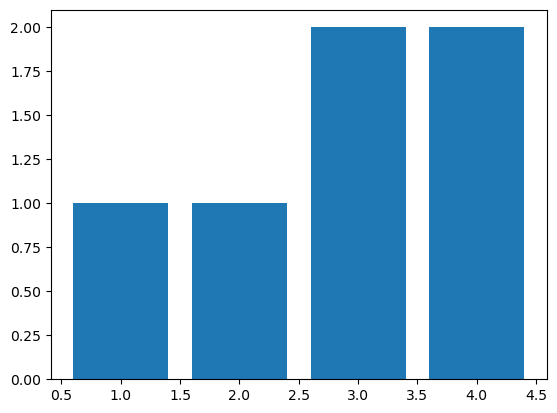

In [259]:
temp = sales0['Product_N'].value_counts()
plt.bar(x = temp.index, height = temp.values)
plt.show()

- pie chart
    * 각도와 방향 조정
        * startangle = 90 : 90도 부터 시작
        * counterclock = False : 시계방향으로
    * 간격 띄우고, 그림자 넣기
        * explode = [0.05, 0.05, 0.05] : 중심으로부터 얼마만큼 띄울지
        * shadow = True : 그림자 추가

([<matplotlib.patches.Wedge at 0x267716ffca0>,
 [Text(0.9526279613277876, 0.5499999702695113, '3'),
  Text(-1.029894326480056e-07, -1.0999999999999954, '4'),
  Text(-1.0999999999999892, 1.5448414893833034e-07, '1'),
  Text(-0.549999836482306, 0.9526280385698485, '2')],
 [Text(0.5196152516333387, 0.2999999837833698, '33.33%'),
  Text(-5.617605417163941e-08, -0.5999999999999974, '33.33%'),
  Text(-0.5999999999999941, 8.426408123908927e-08, '16.67%'),
  Text(-0.2999999108085305, 0.5196152937653719, '16.67%')])

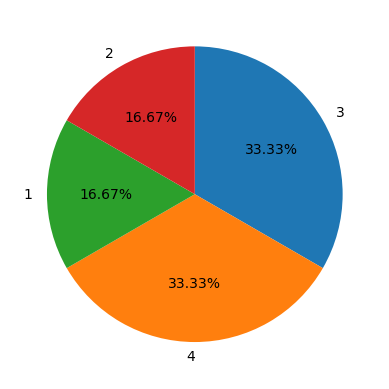

In [262]:
temp = sales0['Product_N'].value_counts()
plt.pie(x = temp.values, labels = temp.index, autopct = '%.2f%%',
       startangle = 90, counterclock = False)